In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/sample_data/bestsellers with categories.csv')

In [26]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [27]:
unique_name = df.drop_duplicates(subset='Name')
print("Кількість унікальних книг у датасеті:", unique_name.shape[0])

# Про скільки книг зберігає дані датасет?
# Відповідь: 351

Кількість унікальних книг у датасеті: 351


In [28]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [29]:
# Чи є в якихось змінних пропуски?
# Перевірте, чи у всіх рядків вистачає даних:
# виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

missing_values = df.isna().sum()
print(missing_values)

# Відповідь : Ні

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [30]:
# Які є унікальні жанри?
# Перевірте, які є унікальні значення в колонці genre

unique_genre = df.genre.unique()
print(unique_genre)

# Відповідь: 'Non Fiction' та 'Fiction'

['Non Fiction' 'Fiction']


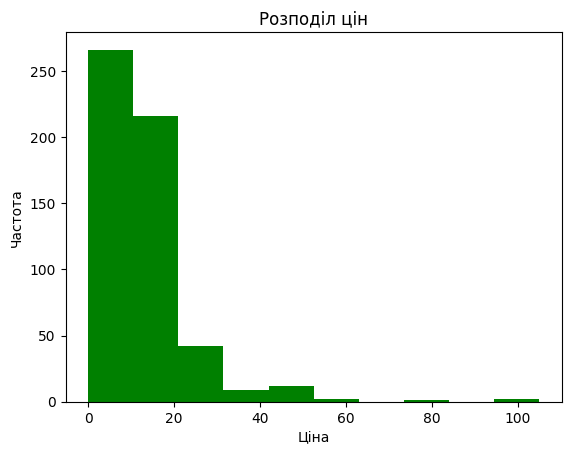

In [31]:
# Тепер подивіться на розподіл цін: побудуйте діаграму

df.price.plot(kind = 'hist', color='green')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')
plt.show()

In [32]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна

max_price = df.price.max()
min_price = df.price.min()
mean_price = df.price.mean()
mediana_price = df.price.median()

print("Максимальна ціна:", max_price,
      "Мінімальна ціна:", min_price,
      "Середня ціна:", mean_price,
      "Медіанна ціна:", mediana_price)

# Відповідь: Максимальна ціна - 105
# Відповідь: Мінімальна ціна - 0
# Відповідь: Середня ціна - 13,1
# Відповідь: Медіанна ціна - 11,0

Максимальна ціна: 105 Мінімальна ціна: 0 Середня ціна: 13.1 Медіанна ціна: 11.0


In [33]:
# Який рейтинг у датасеті найвищий?

max_rating = df.user_rating.max()
print(max_rating)

# Відповідь: 4.9

4.9


In [34]:
# Скільки книг мають такий рейтинг?
num_books_with_max_rating = df[df.user_rating == max_rating].shape[0] # shape[0], ми отримуємо кількість рядків у вибраному датасеті
print(num_books_with_max_rating)

# Відповідь : 52

52


In [35]:
# Яка книга має найбільше відгуків?
max_index_review = df.reviews.idxmax()
book = df.loc[max_index_review]
print(book)

# Відповідь: Where the Crawdads Sing

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object


In [36]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
top_50_2015 = df[df.year == 2015]
most_expensive = top_50_2015.loc[top_50_2015.price.idxmax()]
print(most_expensive)

# Відповідь: Publication Manual of the American Psychologic...

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


In [37]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
num_fiction_2010 = df[(df.year == 2010) & (df.genre == 'Fiction')].shape[0]
print(num_fiction_2010)

# Відповідь: 20

20


In [38]:
num_book_10_11 = df[(df.year.isin([2010, 2011])) & (df.user_rating == 4.9)].shape[0]
print(num_book_10_11)

# num_rating_4_9_2010_2011 = df[((df.year] == 2010) | (df.year] == 2010)) & (df['User Rating'] == 4.9)].shape[0]

# Відповідь: 1

1


In [39]:
num_2015_8 = df[(df.year == 2015) & (df.price < 8)].sort_values(by='price', ascending=True ) # ascending=True - по зростанню
print(num_2015_8)

# Відповідь:  Old School (Diary of a Wimpy Kid #10)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [40]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів

price_genre = df.groupby('genre').agg({'price': ['min', 'max']})
print(price_genre)

# Відповідь: Максимальна ціна для жанру Fiction: Відповідь: 82
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь: 0
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь: 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь: 0

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105


In [41]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів

books_authors = df.groupby('author').agg({'name': 'count'}).reset_index()
books_authors.columns = (['author', 'books_count'])
print(books_authors)

# Якої розмірності вийшла таблиця? Відповідь: (248, 2)
print(books_authors.shape)

# Який автор має найбільше книг? Відповідь: Jeff Kinney
print(books_authors.sort_values(by='books_count', ascending=False))

# Скільки книг цього автора? Відповідь: 12
print(books_authors.sort_values(by='books_count', ascending=False).iloc[0])

                         author  books_count
0              Abraham Verghese            2
1                Adam Gasiewski            1
2                 Adam Mansbach            1
3                     Adir Levy            1
4    Admiral William H. McRaven            1
..                          ...          ...
243             Walter Isaacson            3
244               William Davis            2
245            William P. Young            2
246            Wizards RPG Team            3
247                Zhi Gang Sha            2

[248 rows x 2 columns]
(248, 2)
                                 author  books_count
120                         Jeff Kinney           12
92                         Gary Chapman           11
226                     Suzanne Collins           11
197                        Rick Riordan           11
11   American Psychological Association           10
..                                  ...          ...
61                          David Grann            1
143

In [42]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
rating_author = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
rating_author.columns = ['author', 'user_rating']
# print(rating_author)

# У якого автора середній рейтинг мінімальний?
# Відповідь: Donna Tartt
# Який у цього автора середній рейтинг?
# Відповідь: 3.9
print(rating_author.sort_values(by='user_rating', ascending=True).iloc[0])

author         Donna Tartt
user_rating            3.9
Name: 71, dtype: object


In [43]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг

new_df = pd.concat([books_authors, rating_author['user_rating']], axis=1)
#print(new_df)

# Відсортуйте датафрейм за зростаючою кількістю книг
# та зростаючим рейтингом (використовуйте функцію sort_values)

sorted = new_df.sort_values(by=['books_count', 'user_rating'], ascending=[True, True]).iloc[0]
print(sorted)

# Який автор перший у списку?
# Відповідь: Muriel Barbery


author         Muriel Barbery
books_count                 1
user_rating               4.0
Name: 171, dtype: object


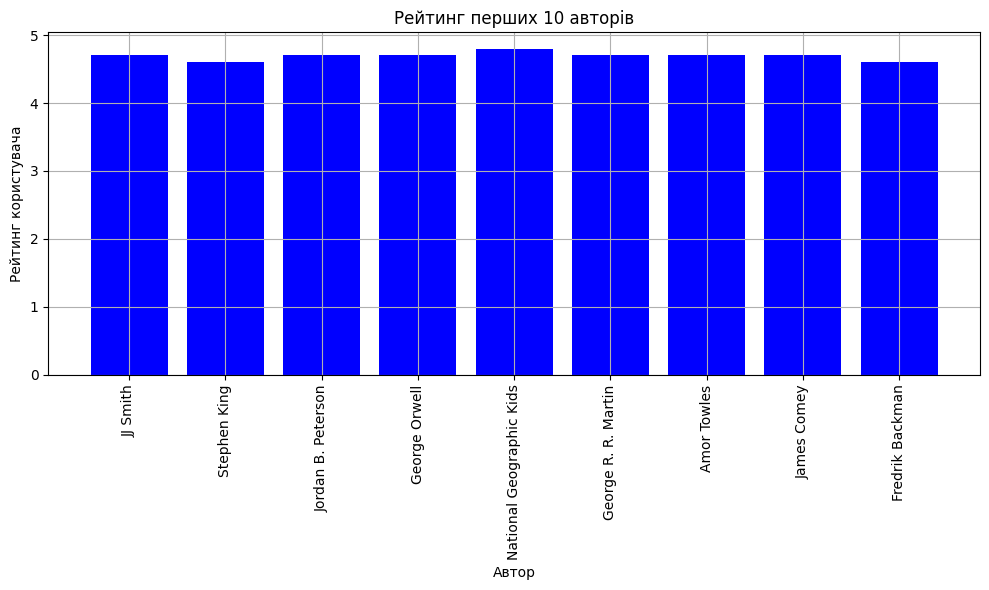

In [44]:
# Графік Рейтинг перших 10 авторів
%matplotlib inline
import matplotlib.pyplot as plt

top_authors = df['author'].head(10)
top_ratings = df['user_rating'].head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_authors, top_ratings, color='blue')
plt.title('Рейтинг перших 10 авторів')
plt.xlabel('Автор')
plt.ylabel('Рейтинг користувача')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()



<ipython-input-45-db15d536e004>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


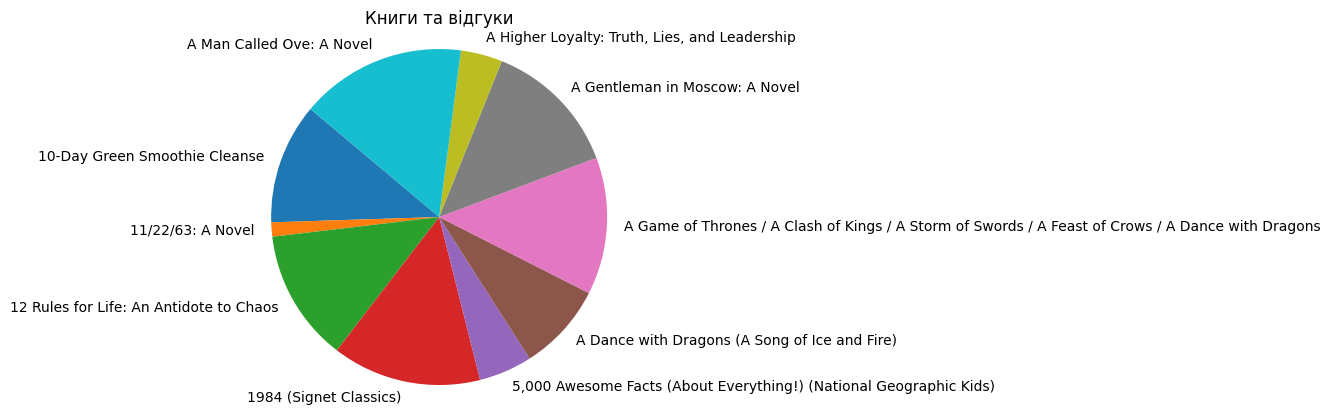

In [45]:
# Графіки Книги та Відгуків

books = df['name'].head(10)
review = df['reviews'].head(10)

# Побудова графіку (кругова діаграма)
plt.pie(review, labels=books, startangle=140)
plt.title('Книги та відгуки')
plt.axis('equal')  # кругова форма
plt.tight_layout()

plt.show()


<ipython-input-46-0de5bb361dec>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


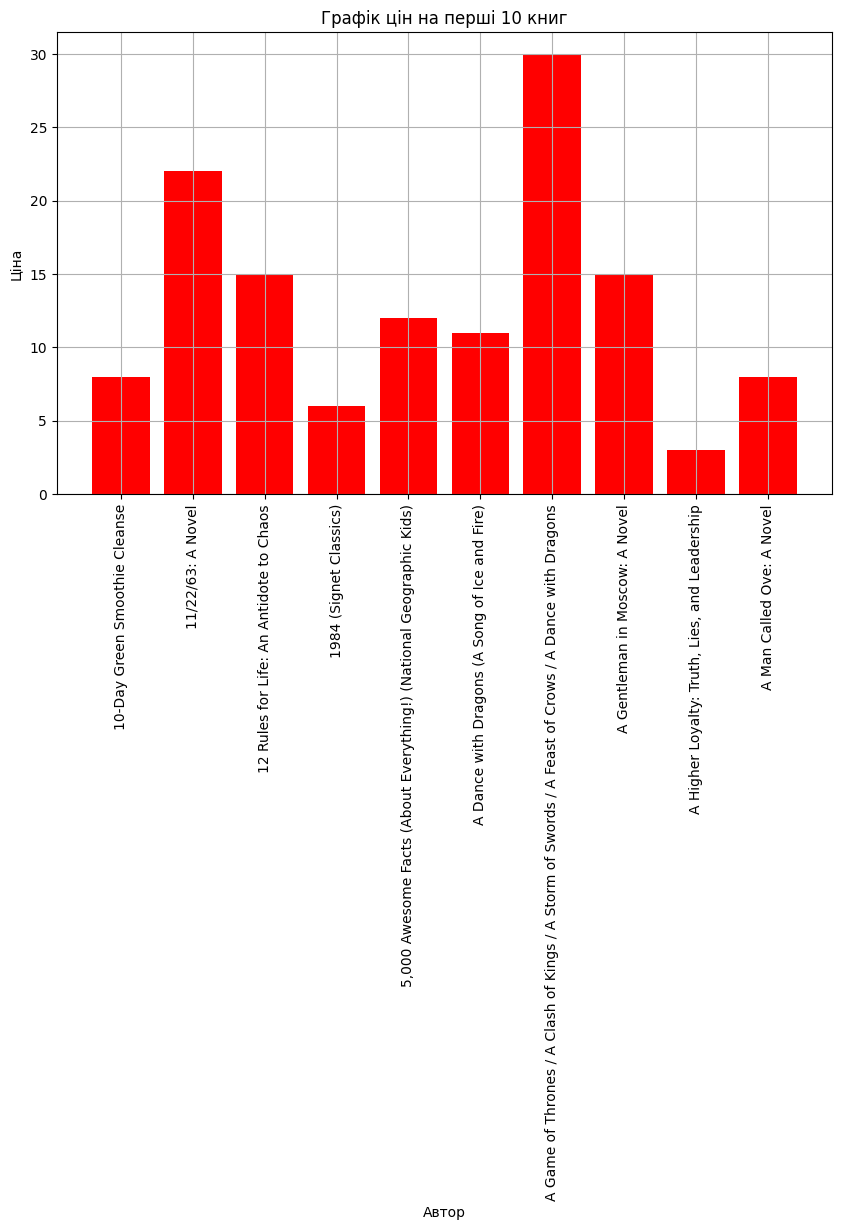

In [46]:
# Графік Книга та ціна
book = df['name'].head(10)
price = df['price'].head(10)

plt.figure(figsize=(10, 6))
plt.bar(book, price, color='red')
plt.title('Графік цін на перші 10 книг')
plt.xlabel('Автор')
plt.ylabel('Ціна')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()
